# Data Interpolation

After the first round of experiments, we observed that jumps in the data were causing poor performance in model predictions. With that motivation, we proposed a way to preprocess the data using interpolation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utils

from typing import Union, List, Tuple
from whittaker_smooth import whittaker_smooth
from scipy.interpolate import CubicSpline

In [2]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/kansas22Data'
bands =  ['B4','B3','B2','B8']

# Dict of the images.
images = utils.load_landsat_image(BASE_DIR, bands)

In [3]:
# Get the days after plant and the dates.
days, dates, hours = utils.images_time_info(images.keys())

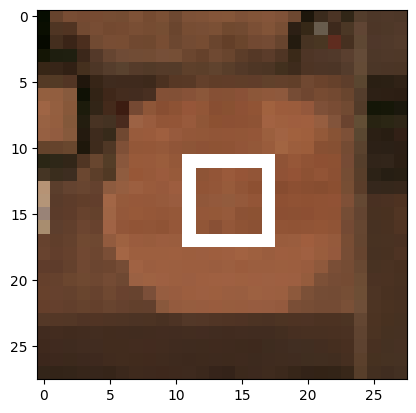

In [4]:
# Calculate the NDVI series over the crop.
ndvi_series = utils.generate_ndvi_time_series(images)

In [5]:
# Preprocess the data.
ndvi_smooth = whittaker_smooth(np.array(ndvi_series), lmbd=10)

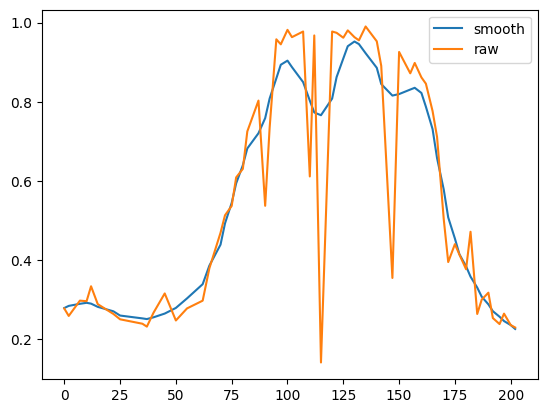

In [6]:
plt.plot(days, ndvi_smooth, label='smooth')
plt.plot(days, ndvi_series, label='raw')
plt.legend()
plt.show()

In [7]:
def interpolate_curve(
    x: Union[List, np.ndarray],
    y: Union[List, np.ndarray],
    n_points: int = 100
) -> Tuple[List]:
    """
    Function to interpolate the curve of the given a N expected points.
    A 1D array are assumed and the boundary conditions of the second derivative
    at curve ends are zero.  
    """
    f_x = CubicSpline(x, y, bc_type='natural')
    x_new = np.linspace(min(x), max(x), n_points)
    y_new = f_x(x_new)

    return x_new, y_new

In [8]:
x_new, y_new = interpolate_curve(days, ndvi_smooth)

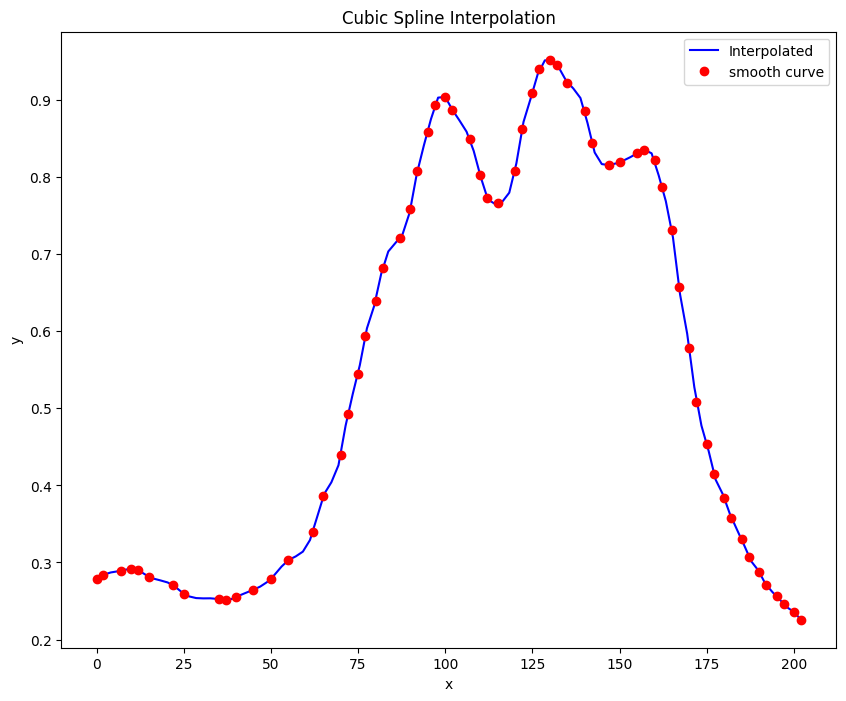

In [9]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b', label='Interpolated')
plt.plot(days, ndvi_smooth, 'ro', label='smooth curve')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()